In [125]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, integrate
import seaborn as sb
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from scipy.stats import boxcox
from sklearn import preprocessing

%matplotlib inline

sb.set_style('darkgrid')
my_dpi = 96

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [126]:
file = '/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/full-ambrose-metrics-ck-oo.csv'
full = pd.read_csv(file)

In [127]:
full.head()
print("Data set has %d observations and %d features" % (full.shape[0], full.shape[1]))

Data set has 5371 observations and 20 features


In [128]:
# Check for missing data
print("%s\n" % (full.isnull().sum()))

# Lets ensure that all columns are of the expected type object and int (or float)
print("\n%s\n" % (full.dtypes))
#full.to_csv('/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/full_metrics_bugs.csv')

classname       0
cbo             0
dit             0
ca              0
ce              0
lcom            0
noc             0
noa             0
noai            0
loc             0
nom             0
nomi            0
nopra           0
noprm           0
nopa            0
npm             0
rfc             0
wmc             0
bugs            0
             4374
dtype: int64


classname    object
cbo           int64
dit           int64
ca            int64
ce            int64
lcom          int64
noc           int64
noa           int64
noai          int64
loc           int64
nom           int64
nomi          int64
nopra         int64
noprm         int64
nopa          int64
npm           int64
rfc           int64
wmc           int64
bugs          int64
             object
dtype: object



In [129]:
full.classname.unique().shape

(5371,)

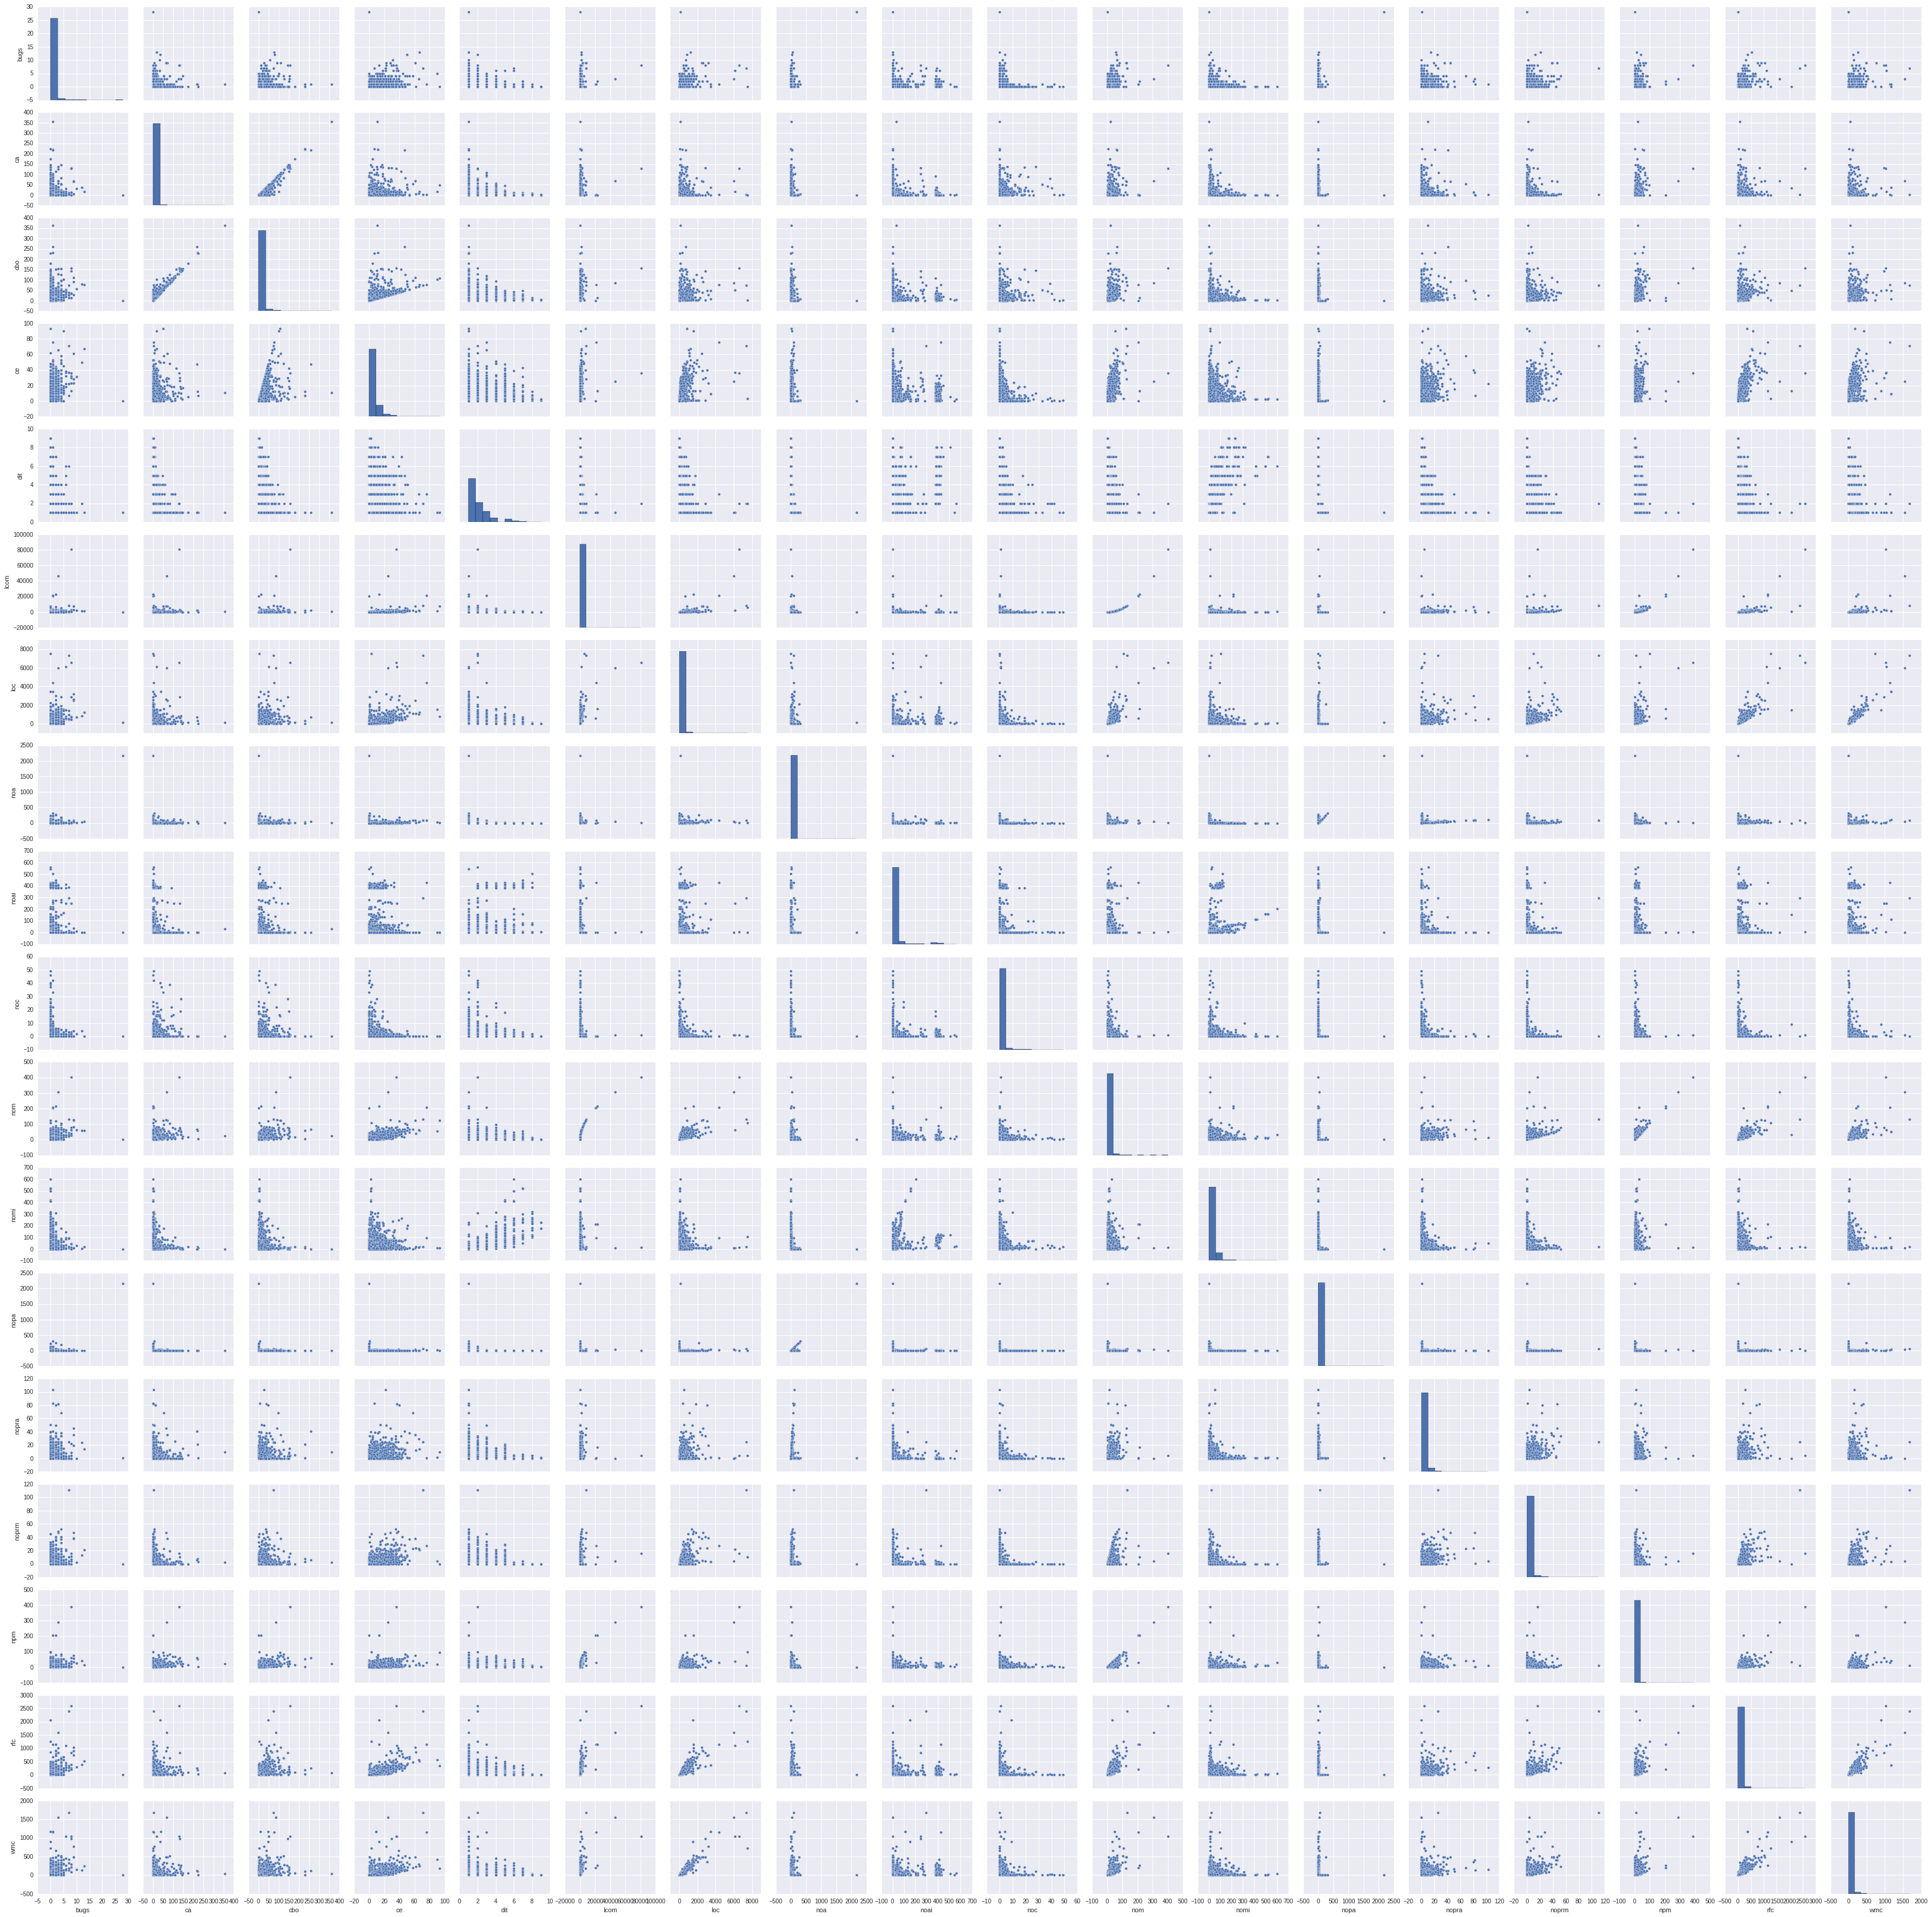

In [130]:
exclude = ['classname']
data_for_plotting = full.ix[:, full.columns.difference(exclude)] 
__ = sb.pairplot(data_for_plotting)

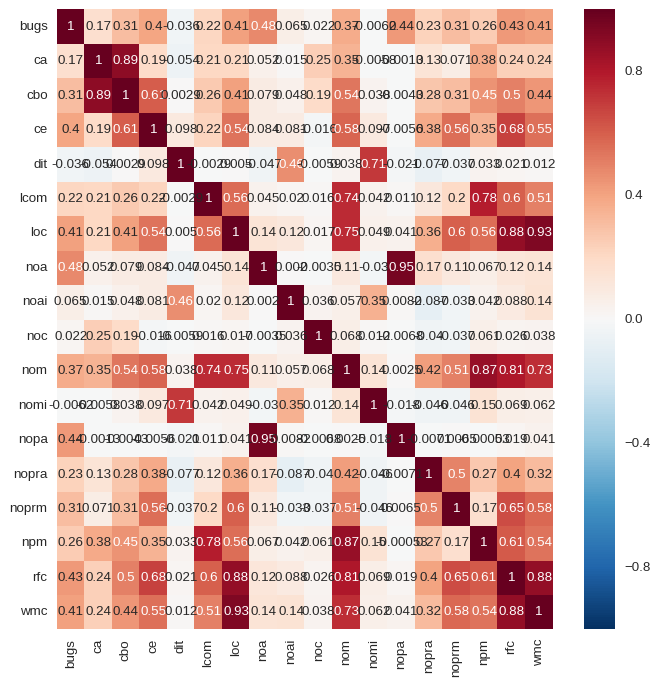

In [131]:
corr = full.ix[:, full.columns.difference(exclude)].corr()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__  = sb.heatmap(corr, annot=True)

## 1 - Weighted Methods per Class
The value of the WMC is equal  to  the  number  of  methods  in  the  class  (assuming  unity weights for all methods)

count    5371.000000
mean       28.291380
std        69.140371
min         0.000000
25%         4.000000
50%        11.000000
75%        27.000000
max      1680.000000
Name: wmc, dtype: float64

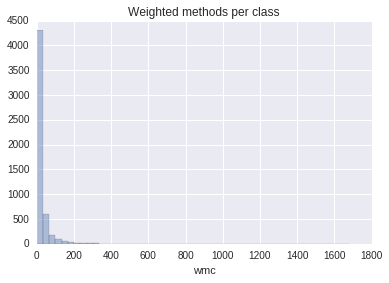

In [132]:
sb.distplot(full.wmc, kde=False)
__ = plt.title('Weighted methods per class')
full.wmc.describe()

### Transformation and scaling

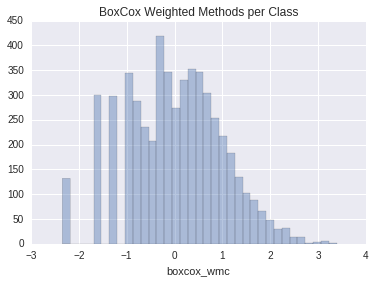

In [133]:
full['boxcox_wmc'] = preprocessing.scale(boxcox(full.wmc + 1) [0])
sb.distplot(full.boxcox_wmc, kde=False)
__ = plt.title('BoxCox Weighted Methods per Class')

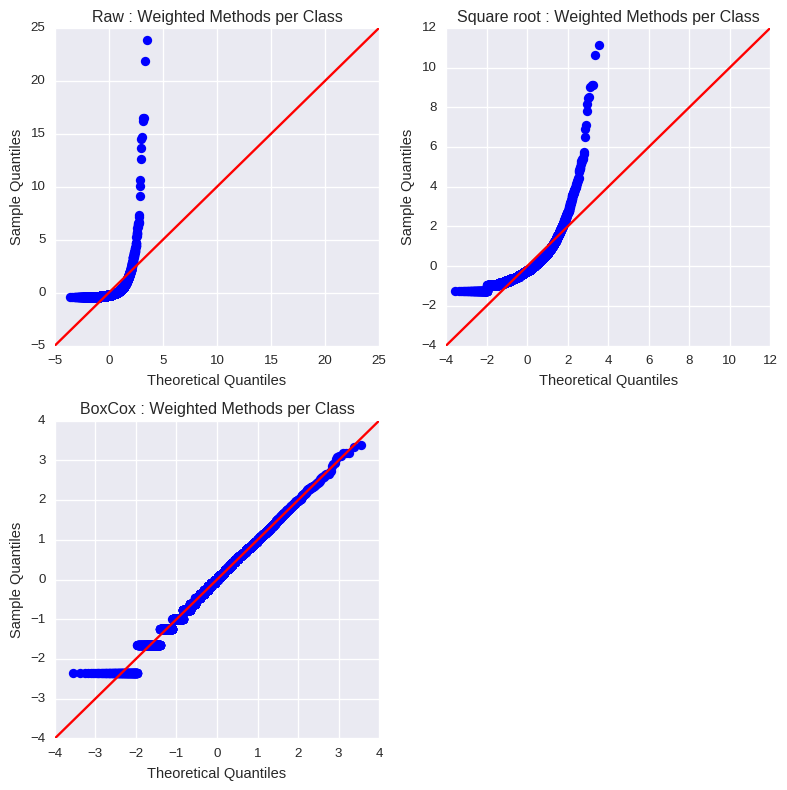

In [134]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.wmc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Weighted Methods per Class')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.wmc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Weighted Methods per Class')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_wmc, line='45', fit=True, ax=ax)
ax.set_title('BoxCox : Weighted Methods per Class')
plt.tight_layout()

## 2 - Depth of Inheritance Tree
The number of class definitions from  the top of the class hierarchy to the leaf.

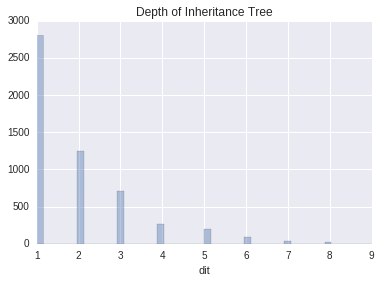

In [135]:
sb.distplot(full.dit, kde=False)
__ = plt.title('Depth of Inheritance Tree')

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


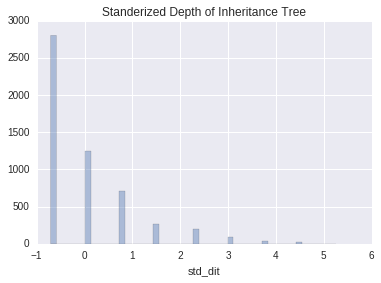

In [136]:
full['std_dit'] = preprocessing.scale(full.dit)
sb.distplot(full.std_dit, kde=False)
__ = plt.title('Standerized Depth of Inheritance Tree')

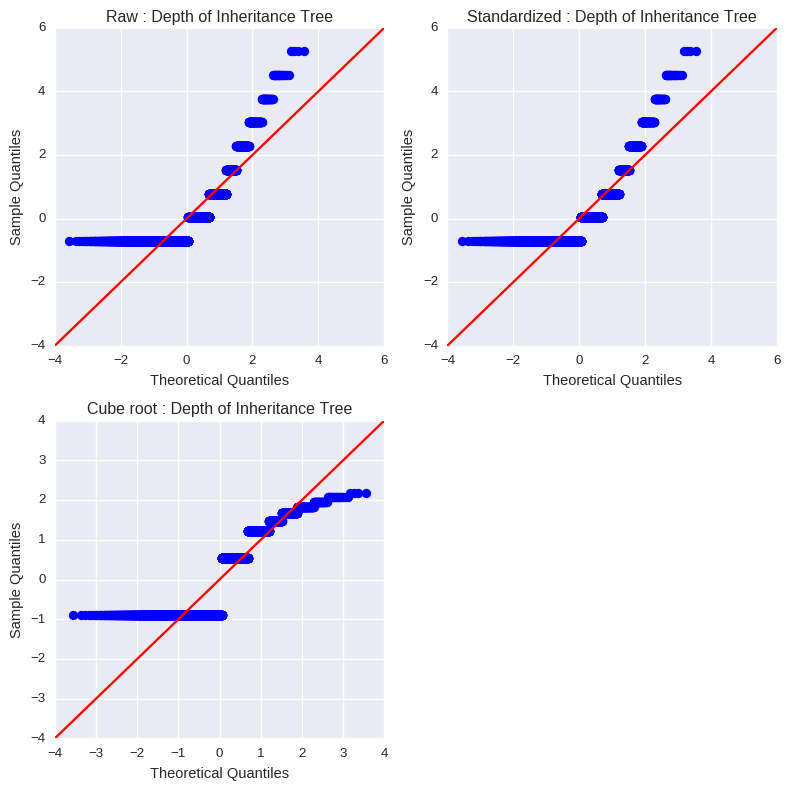

In [137]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.dit, line='45', fit=True, ax=ax)
ax.set_title('Raw : Depth of Inheritance Tree')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(full.std_dit, line='45', fit=True, ax=ax)
ax.set_title('Standardized : Depth of Inheritance Tree')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(full.std_dit), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Depth of Inheritance Tree')
plt.tight_layout()

## 3 - Number of Children 
The number of immediate descendants of the class under question.

count    5371.000000
mean        0.548687
std         2.320663
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        49.000000
Name: noc, dtype: float64

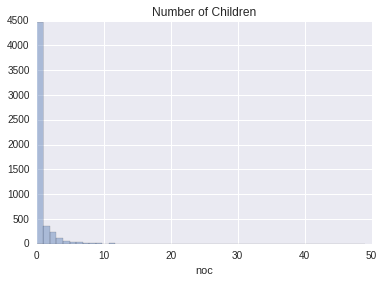

In [138]:
sb.distplot(full.noc, kde=False)
__ = plt.title('Number of Children')
full.noc.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


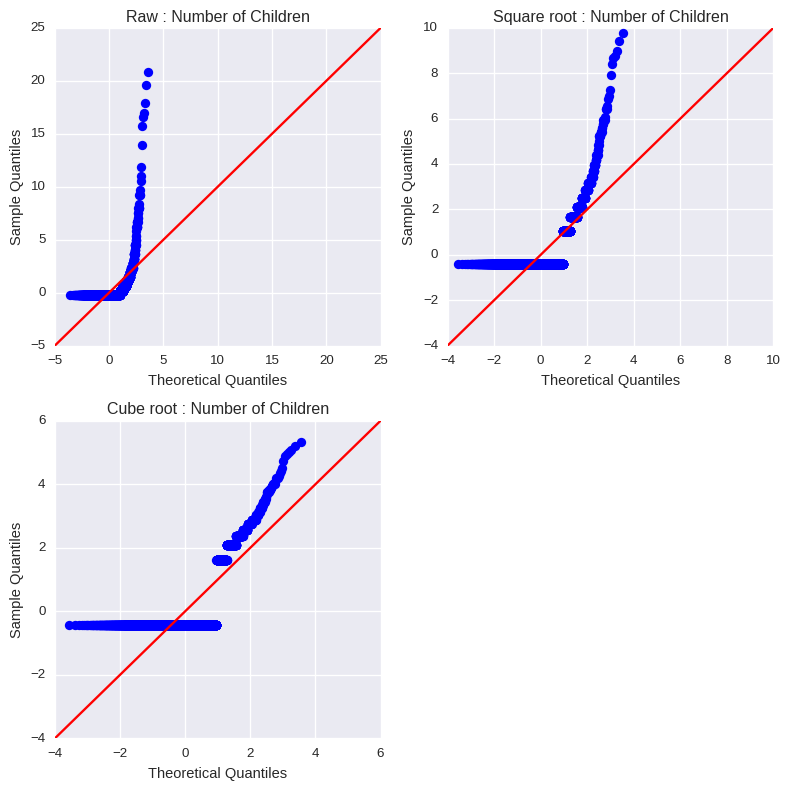

In [139]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.noc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Children')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.noc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Children')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.noc)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of Children')
plt.tight_layout()

# use cube root scaled version
full['cbrt_noc'] = np.cbrt(preprocessing.scale(full.noc))

## 4 - Coupling between classes
Represents   the   number   of   classes   coupled   to   a   given   class   (efferent  couplings  and  afferent  couplings). These  couplings  can  occur  through  method  calls, field  accesses,  inheritance,  method  arguments, return types, and exceptions. 

count    5371.000000
mean        9.650717
std        15.430910
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       362.000000
Name: cbo, dtype: float64

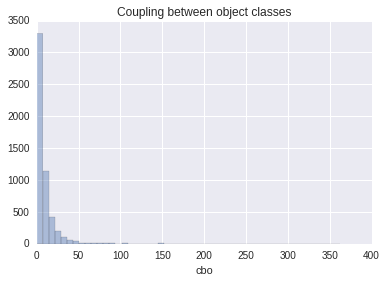

In [140]:
sb.distplot(full.cbo, kde=False)
__ = plt.title('Coupling between object classes')
full.cbo.describe()

### Transformation and scaling

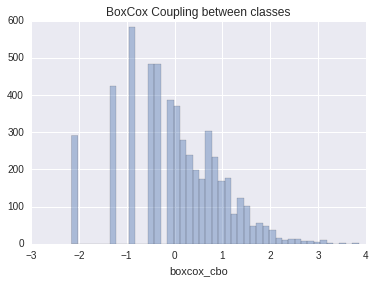

In [141]:
full['boxcox_cbo'] = preprocessing.scale(boxcox(full.cbo + 1) [0])
sb.distplot(full.boxcox_cbo, kde=False)
__ = plt.title('BoxCox Coupling between classes')

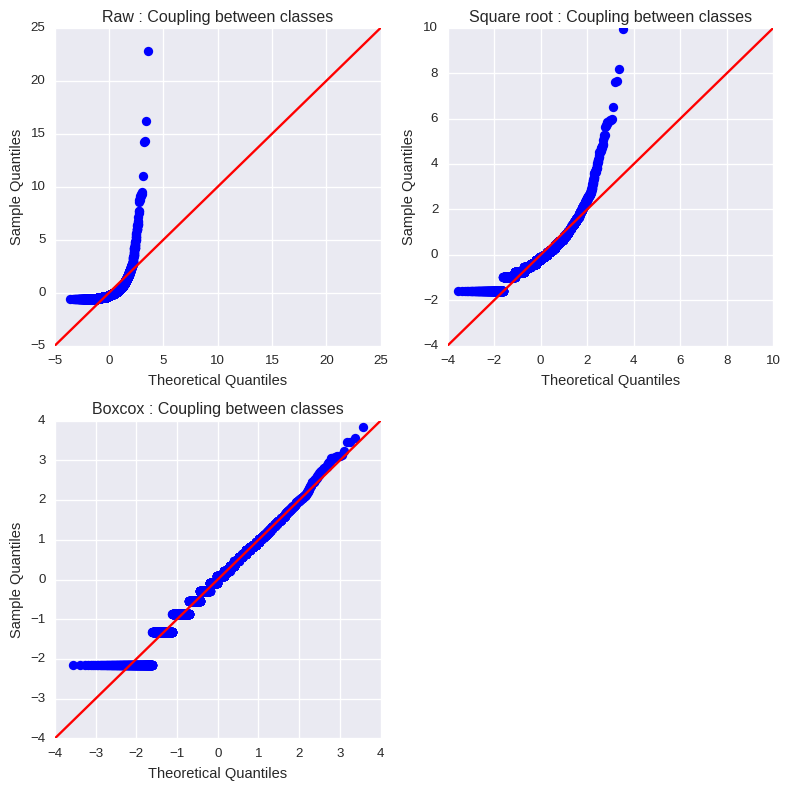

In [142]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.cbo, line='45', fit=True, ax=ax)
ax.set_title('Raw : Coupling between classes')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.cbo), line='45', fit=True, ax=ax)
ax.set_title('Square root : Coupling between classes')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_cbo, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Coupling between classes')
plt.tight_layout()

## 5 - Response for a Class
Measures the number of different methods that can be executed when an instance of that class has an interface method invoked.
Transitive closure of the method call graph.

count    5371.000000
mean       47.397133
std       100.978959
min         0.000000
25%         8.000000
50%        21.000000
75%        51.000000
max      2603.000000
Name: rfc, dtype: float64

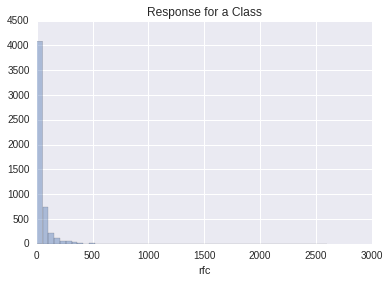

In [143]:
sb.distplot(full.rfc, kde=False)
__ = plt.title('Response for a Class')
full.rfc.describe()

### Transformation and scaling

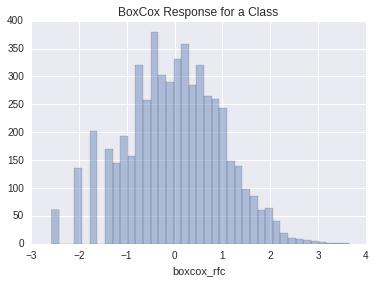

In [144]:
full['boxcox_rfc'] = preprocessing.scale(boxcox(full.rfc + 1) [0])
sb.distplot(full.boxcox_rfc, kde=False)
__ = plt.title('BoxCox Response for a Class')

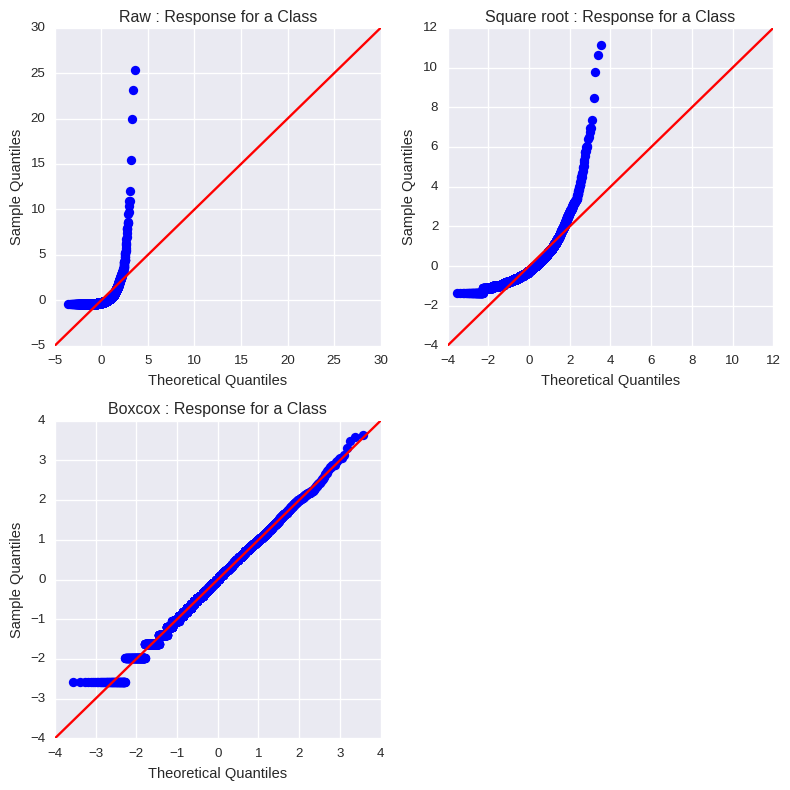

In [145]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.rfc, line='45', fit=True, ax=ax)
ax.set_title('Raw : Response for a Class')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.rfc), line='45', fit=True, ax=ax)
ax.set_title('Square root : Response for a Class')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_rfc, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Response for a Class')
plt.tight_layout()

## 6 - Lack of Cohesion in Methods
Counts the sets of methods in a class that are not related through the sharing of some of the class attributes.

count     5371.000000
mean       131.440328
std       1419.297581
min          0.000000
25%          3.000000
50%         15.000000
75%         55.000000
max      81003.000000
Name: lcom, dtype: float64

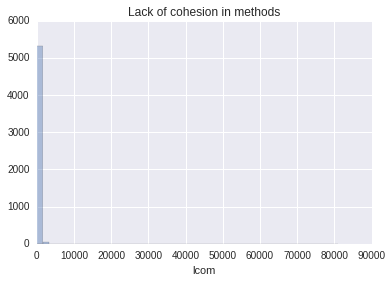

In [146]:
sb.distplot(full.lcom, kde=False)
__ = plt.title('Lack of cohesion in methods')
full.lcom.describe()

### Transformation and scaling

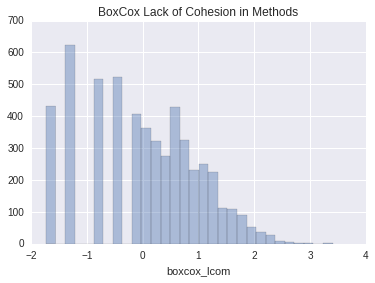

In [147]:
full['boxcox_lcom'] = preprocessing.scale(boxcox(full.lcom + 1) [0])
sb.distplot(full.boxcox_lcom, kde=False)
__ = plt.title('BoxCox Lack of Cohesion in Methods')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


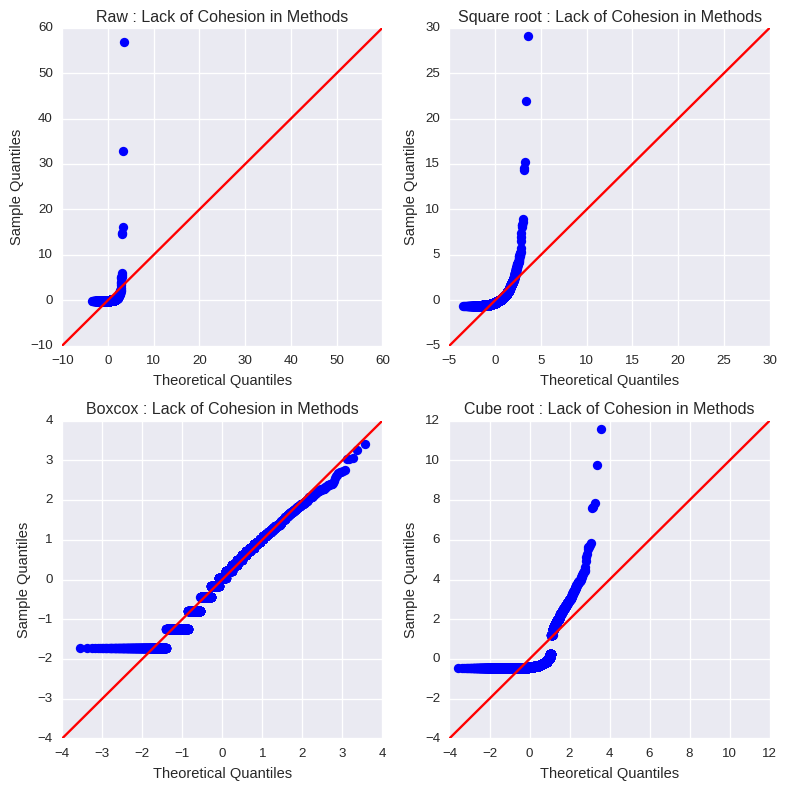

In [148]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.lcom, line='45', fit=True, ax=ax)
ax.set_title('Raw : Lack of Cohesion in Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.lcom), line='45', fit=True, ax=ax)
ax.set_title('Square root : Lack of Cohesion in Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_lcom, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Lack of Cohesion in Methods')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.lcom)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Lack of Cohesion in Methods')

plt.tight_layout()

## 7 - Number of attributes

The total number of private and public attributes defined within the class.

count    5371.000000
mean        5.648110
std        32.421878
min         0.000000
25%         1.000000
50%         2.000000
75%         5.000000
max      2169.000000
Name: noa, dtype: float64

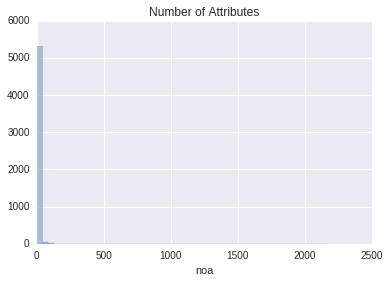

In [149]:
sb.distplot(full.noa, kde=False)
__ = plt.title('Number of Attributes')
full.noa.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


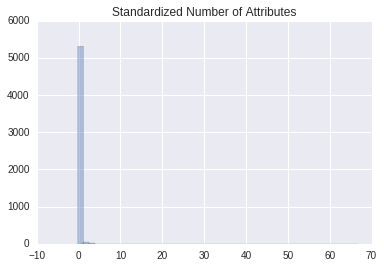

In [150]:
sb.distplot(preprocessing.scale(full.noa), kde=False)
__ = plt.title('Standardized Number of Attributes')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


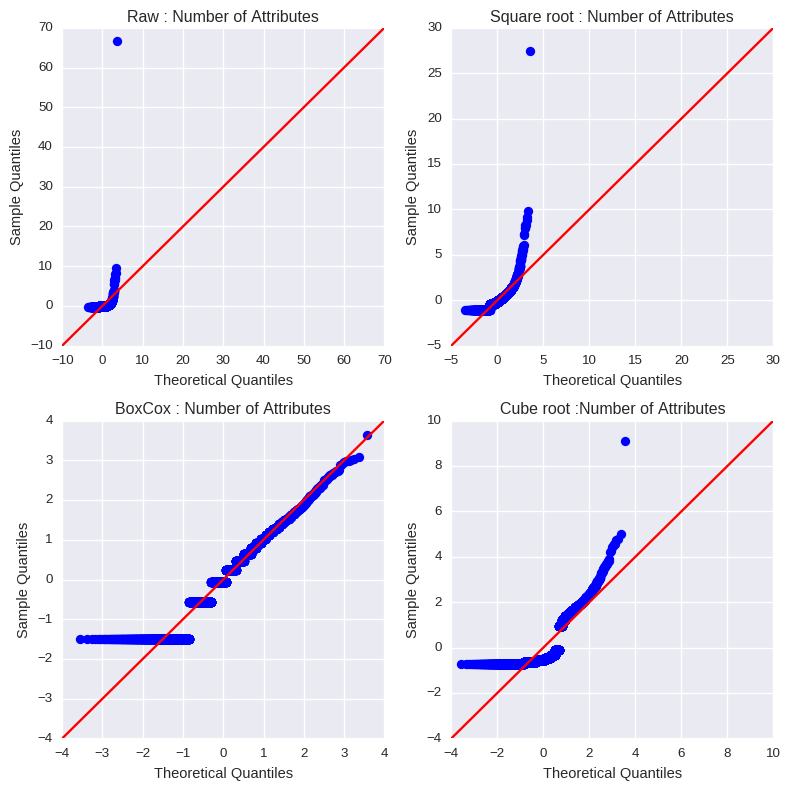

In [151]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.noa, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Attributes')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.noa), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Attributes')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.noa + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('BoxCox : Number of Attributes')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.noa)), line='45', fit=True, ax=ax)
ax.set_title('Cube root :Number of Attributes')

plt.tight_layout()

# use BoxCox version
full['boxcox_noa'] = preprocessing.scale(boxcox(full.noa + 1) [0])

## 8 - Number of Public Methods
The methods in a class that are declared as public. The metric is known also as Class Interface Size (CIS) 

count    5371.000000
mean        6.271272
std        10.583760
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max       387.000000
Name: npm, dtype: float64

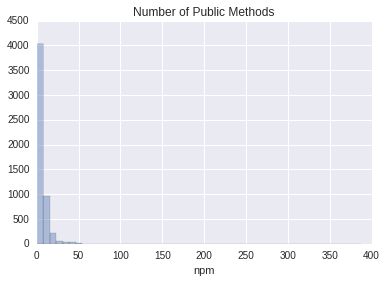

In [152]:
sb.distplot(full.npm, kde=False)
__ = plt.title('Number of Public Methods')
full.npm.describe()

### Transformation and scaling

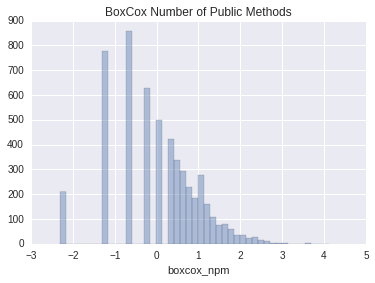

In [153]:
full['boxcox_npm'] = preprocessing.scale(boxcox(full.npm + 1) [0])
sb.distplot(full.boxcox_npm, kde=False)
__ = plt.title('BoxCox Number of Public Methods')

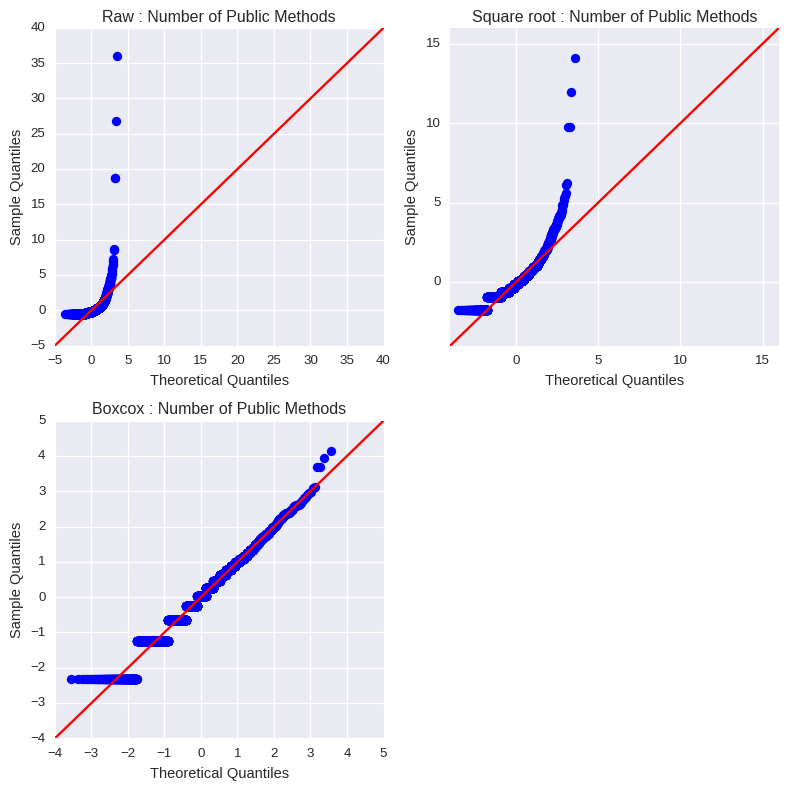

In [154]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.npm, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Public Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.npm), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Public Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_npm, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Number of Public Methods')
plt.tight_layout()

## 9 - Number of public attributes
The number of class attributes that have an access modifier of public. 

count    5371.000000
mean        1.588903
std        30.836387
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      2168.000000
Name: nopa, dtype: float64

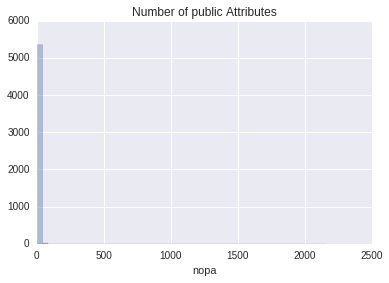

In [155]:
sb.distplot(full.nopa, kde=False)
__ = plt.title('Number of public Attributes')
full.nopa.describe()

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


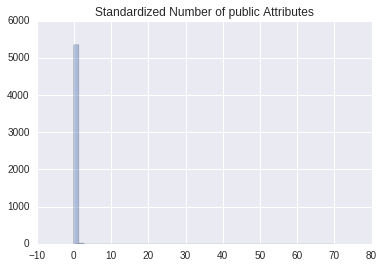

In [156]:
sb.distplot(preprocessing.scale(full.nopa), kde=False)
__ = plt.title('Standardized Number of public Attributes')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


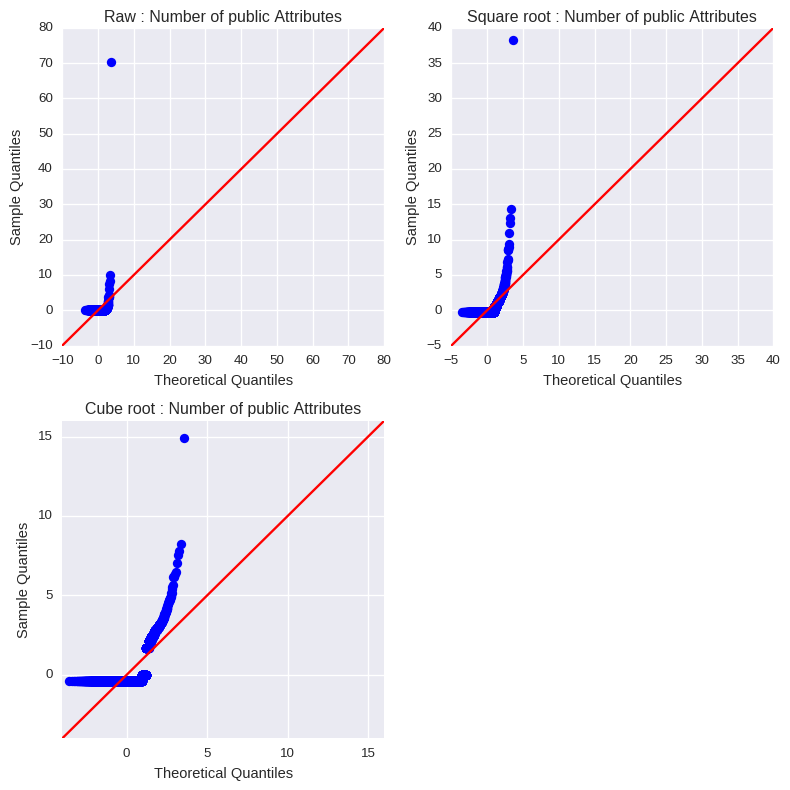

In [157]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.nopa, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of public Attributes')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.nopa), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of public Attributes')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.nopa)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of public Attributes')

plt.tight_layout()

# Use cube root
full['cbrt_nopa'] = np.cbrt(preprocessing.scale(full.nopa))

## 10 - Number of private attributes
The number of class attributes that have an access modifier of private.  

count    5371.000000
mean        2.701545
std         5.005445
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max       103.000000
Name: nopra, dtype: float64

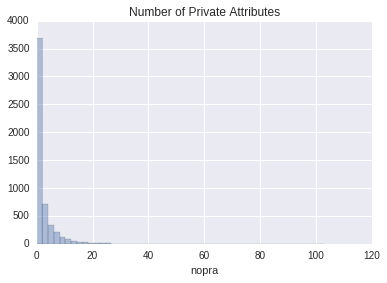

In [158]:
sb.distplot(full.nopra, kde=False)
__ = plt.title('Number of Private Attributes')
full.nopra.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


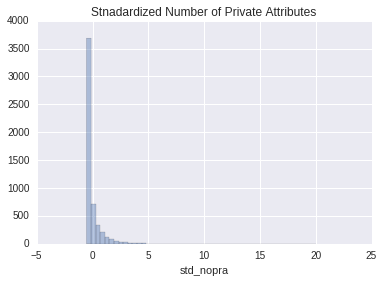

In [159]:
full['std_nopra'] = preprocessing.scale(full.nopra) 
sb.distplot(full.std_nopra, kde=False)
__ = plt.title('Stnadardized Number of Private Attributes')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


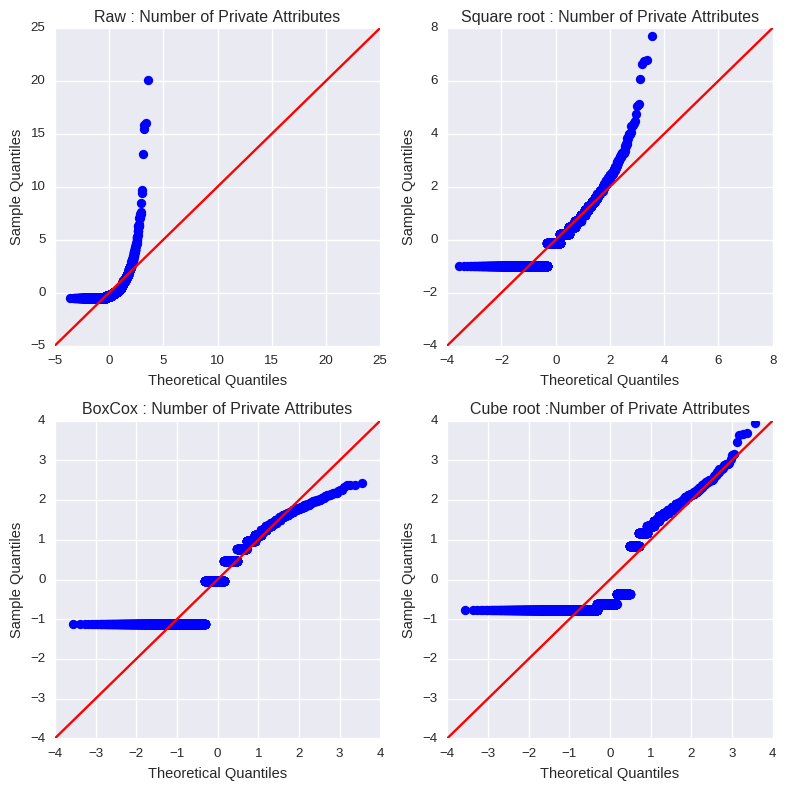

In [160]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.nopra, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Private Attributes')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.nopra), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Private Attributes')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.nopra + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('BoxCox : Number of Private Attributes')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.nopra)), line='45', fit=True, ax=ax)
ax.set_title('Cube root :Number of Private Attributes')

plt.tight_layout()

# Use cube root
del full['std_nopra']
full['cbrt_nopra'] = np.cbrt(preprocessing.scale(full.nopra))

## 11 - Number of attributes inherited
This total number of inherited attributes from parents of class in question.

count    5371.000000
mean       20.607522
std        75.447749
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max       563.000000
Name: noai, dtype: float64

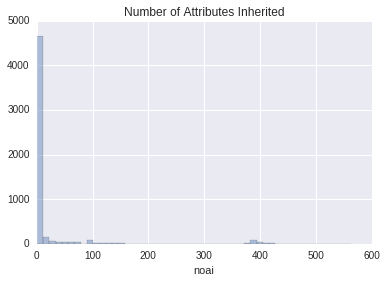

In [161]:
sb.distplot(full.noai, kde=False)
__ = plt.title('Number of Attributes Inherited')
full.noai.describe()

### Transformation and scaling

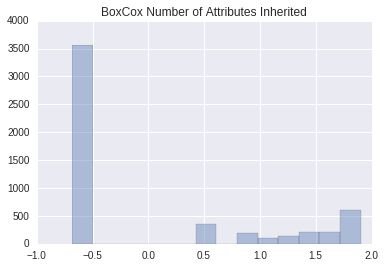

In [162]:
sb.distplot(preprocessing.scale(boxcox(full.noai + 1) [0]), kde=False)
__ = plt.title('BoxCox Number of Attributes Inherited')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


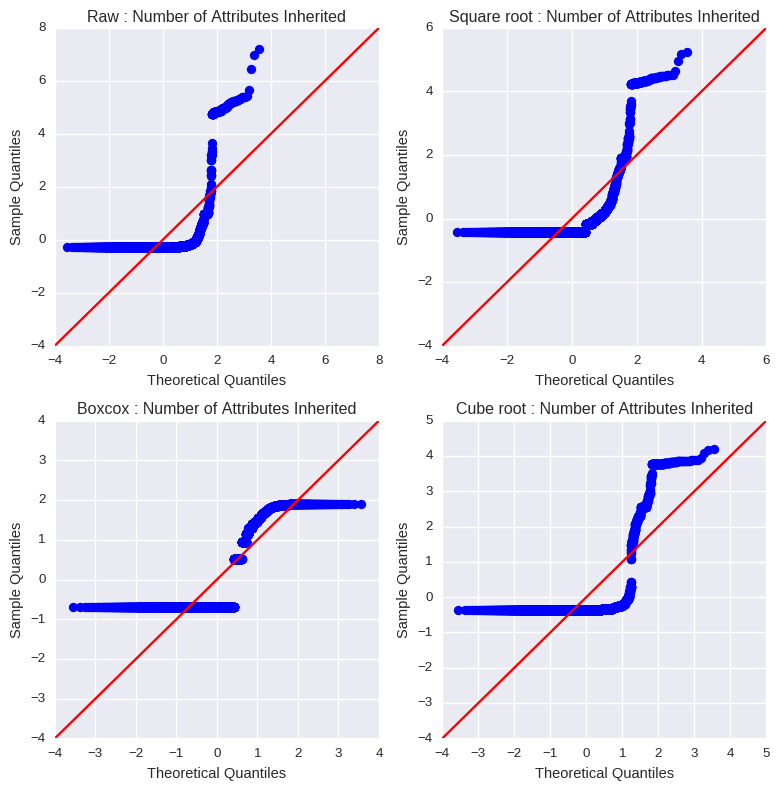

In [163]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.noai, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Attributes Inherited')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.noai), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Attributes Inherited')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.noai + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Number of Attributes Inherited')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.noai)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of Attributes Inherited')
plt.tight_layout()

# Use cube root
full['cbrt_noai'] = np.cbrt(preprocessing.scale(full.noai))

## 12 - Afferent couplings 
The number of classes that depend upon the measured class. 

count    5371.000000
mean        4.077825
std        12.763334
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       355.000000
Name: ca, dtype: float64

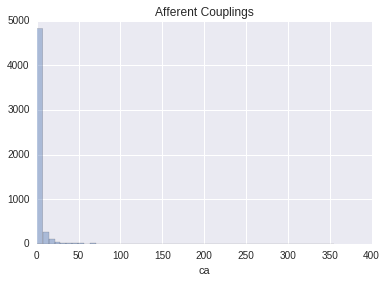

In [164]:
sb.distplot(full.ca, kde=False)
__ = plt.title('Afferent Couplings')
full.ca.describe()

### Transformation and scaling

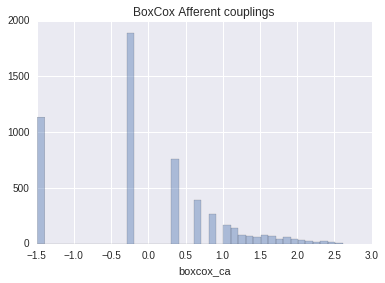

In [165]:
full['boxcox_ca'] = preprocessing.scale(boxcox(full.ca + 1) [0])
sb.distplot(full.boxcox_ca, kde=False)
__ = plt.title('BoxCox Afferent couplings')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


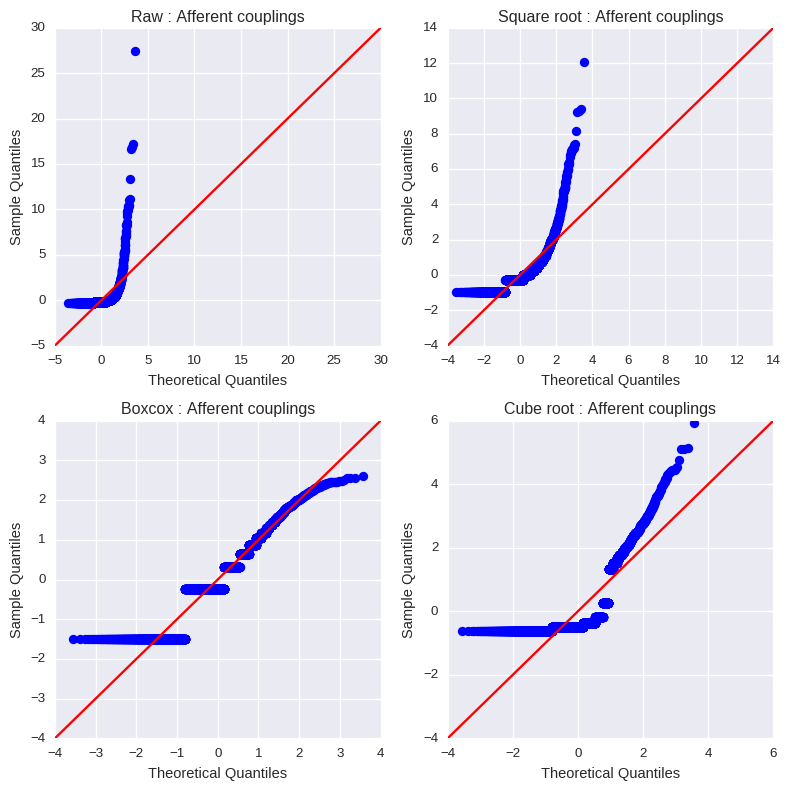

In [166]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.ca, line='45', fit=True, ax=ax)
ax.set_title('Raw : Afferent couplings')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.ca), line='45', fit=True, ax=ax)
ax.set_title('Square root : Afferent couplings')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_ca, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Afferent couplings')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.ca)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Afferent couplings')
plt.tight_layout()

## 13 - Efferent couplings 
The number of classes that the measured class is depended upon. 

count    5371.000000
mean        5.808229
std         7.413065
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        93.000000
Name: ce, dtype: float64

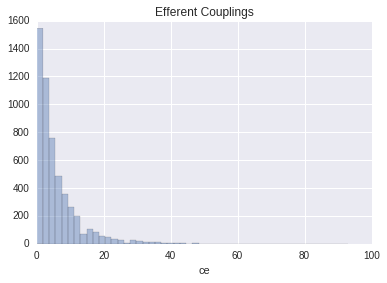

In [167]:
sb.distplot(full.ce, kde=False)
__ = plt.title('Efferent Couplings')
full.ce.describe()

### Transformation and scaling

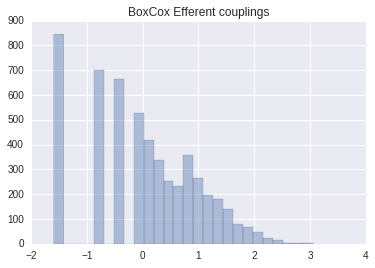

In [168]:
sb.distplot(preprocessing.scale(boxcox(full.ce + 1) [0]), kde=False)
__ = plt.title('BoxCox Efferent couplings')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


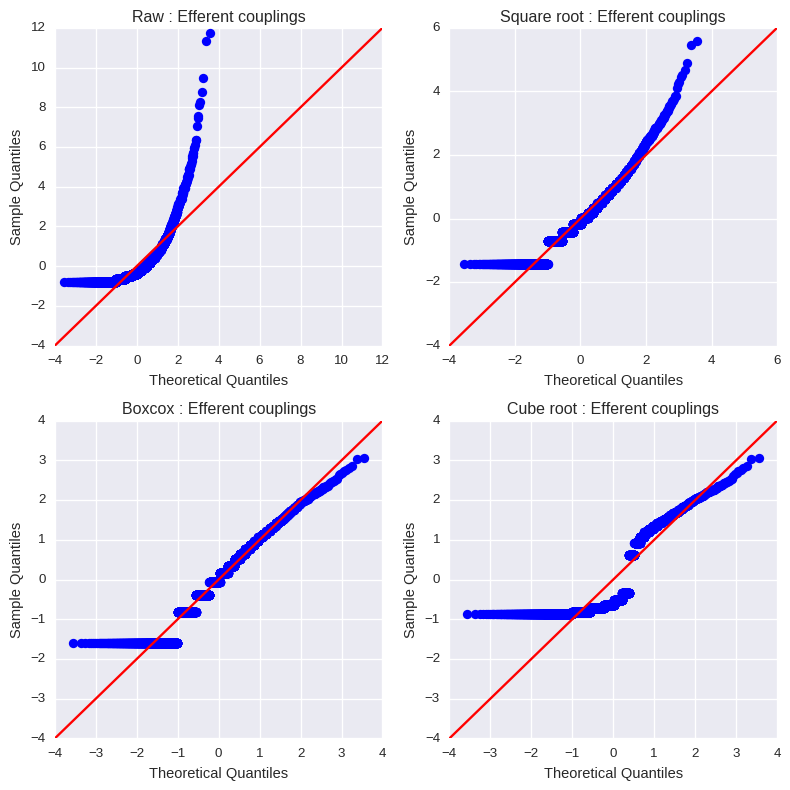

In [169]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.ce, line='45', fit=True, ax=ax)
ax.set_title('Raw : Efferent couplings')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.ce), line='45', fit=True, ax=ax)
ax.set_title('Square root : Efferent couplings')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.ce + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Efferent couplings')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.ce)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Efferent couplings')
plt.tight_layout()

## Use Cube root
full['cbrt_ce'] = np.cbrt(preprocessing.scale(full.ce))

## 14 - Lines of Code
The number of lines of code in the Java binary code of the class under investigation.  

count    5371.000000
mean      119.302923
std       305.085033
min         0.000000
25%        19.000000
50%        47.000000
75%       115.000000
max      7509.000000
Name: loc, dtype: float64

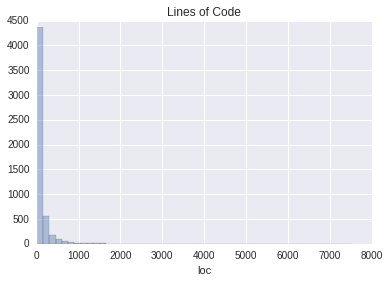

In [170]:
sb.distplot(full['loc'], kde=False)
__ = plt.title('Lines of Code')
full['loc'].describe()

### Transformation and scaling

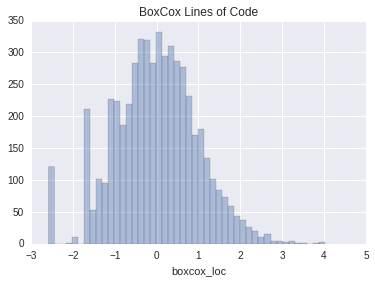

In [171]:
full['boxcox_loc'] = preprocessing.scale(boxcox(full['loc'] + 1) [0])
sb.distplot(full.boxcox_loc, kde=False)
__ = plt.title('BoxCox Lines of Code')

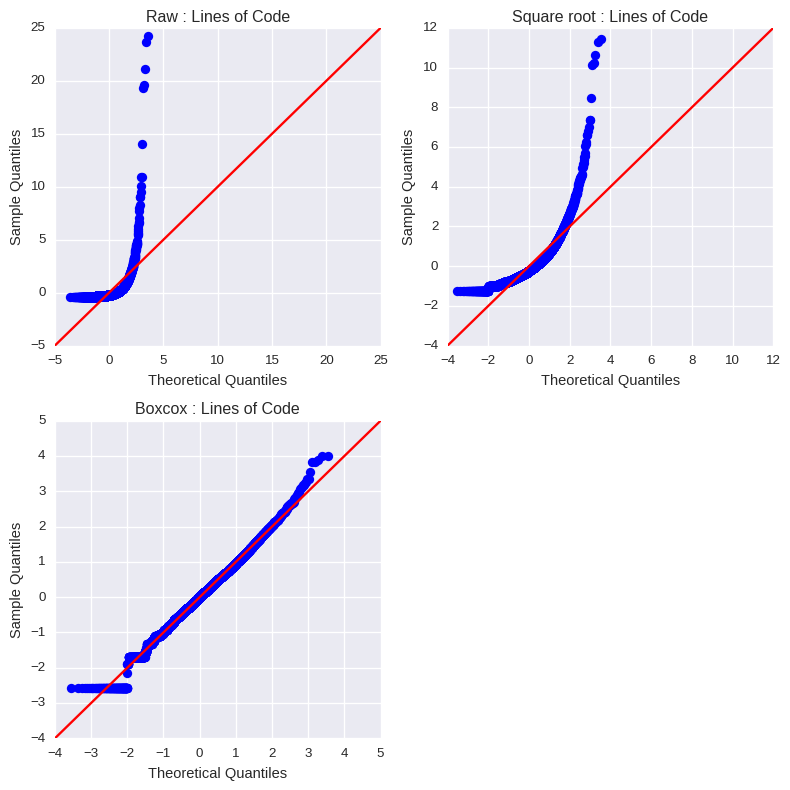

In [172]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full['loc'], line='45', fit=True, ax=ax)
ax.set_title('Raw : Lines of Code')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full['loc']), line='45', fit=True, ax=ax)
ax.set_title('Square root : Lines of Code')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(full.boxcox_loc, line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Lines of Code')
plt.tight_layout()

## 15 - Number of Private Methods
The total number of methods within a class definition that have private access modifier. 

count    5371.000000
mean        1.515733
std         4.259624
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       111.000000
Name: noprm, dtype: float64

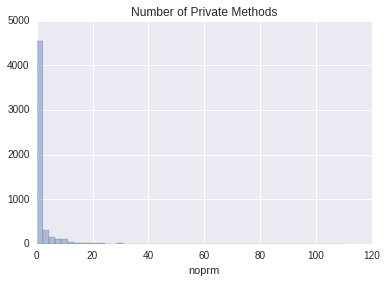

In [173]:
sb.distplot(full.noprm, kde=False)
__ = plt.title('Number of Private Methods')
full.noprm.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


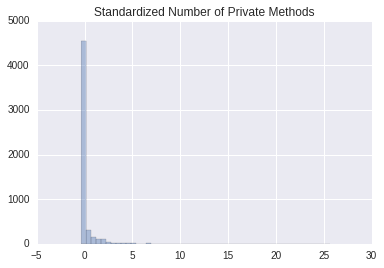

In [174]:
sb.distplot(preprocessing.scale(full.noprm), kde=False)
__ = plt.title('Standardized Number of Private Methods')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


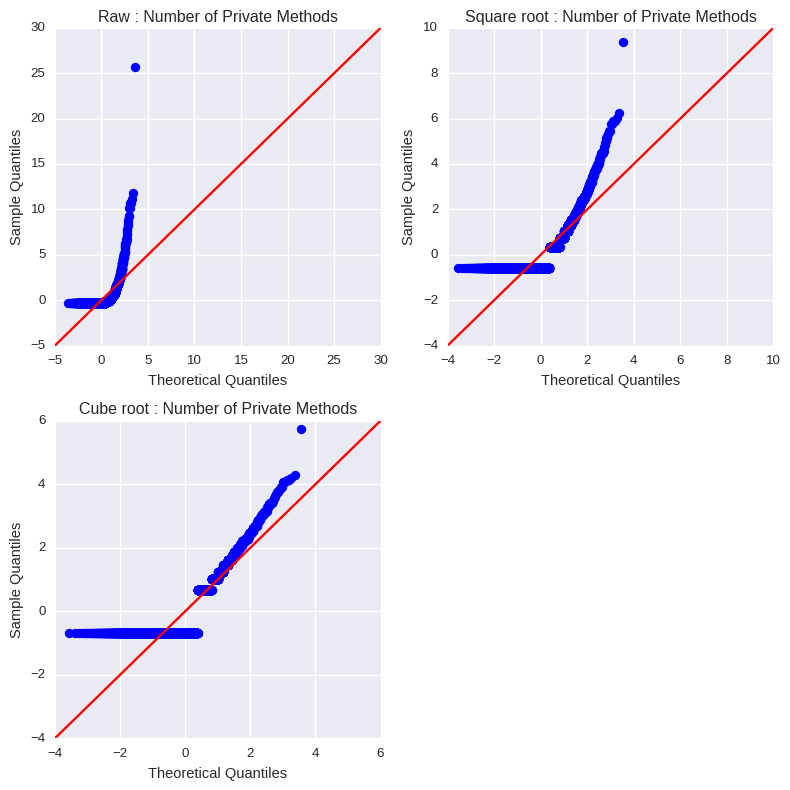

In [175]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.noprm, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Private Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.noprm), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Private Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(full.noprm), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of Private Methods')
plt.tight_layout()

# Use Cube root
full['cbrt_noprm'] = np.cbrt(preprocessing.scale(full.noprm))

## 16 - Number of Methods
The total number of methods contain within a class Declaration.

count    5371.000000
mean        9.465649
std        13.519683
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max       403.000000
Name: nom, dtype: float64

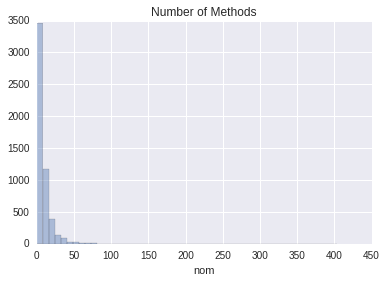

In [176]:
sb.distplot(full.nom, kde=False)
__ = plt.title('Number of Methods')
full.nom.describe()

### Transformation and scaling

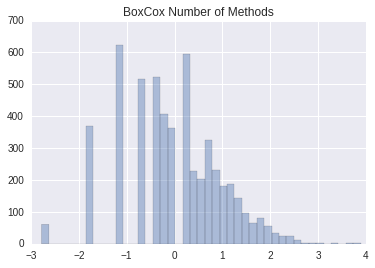

In [177]:
sb.distplot(preprocessing.scale(boxcox(full.nom + 1) [0]), kde=False)
__ = plt.title('BoxCox Number of Methods')

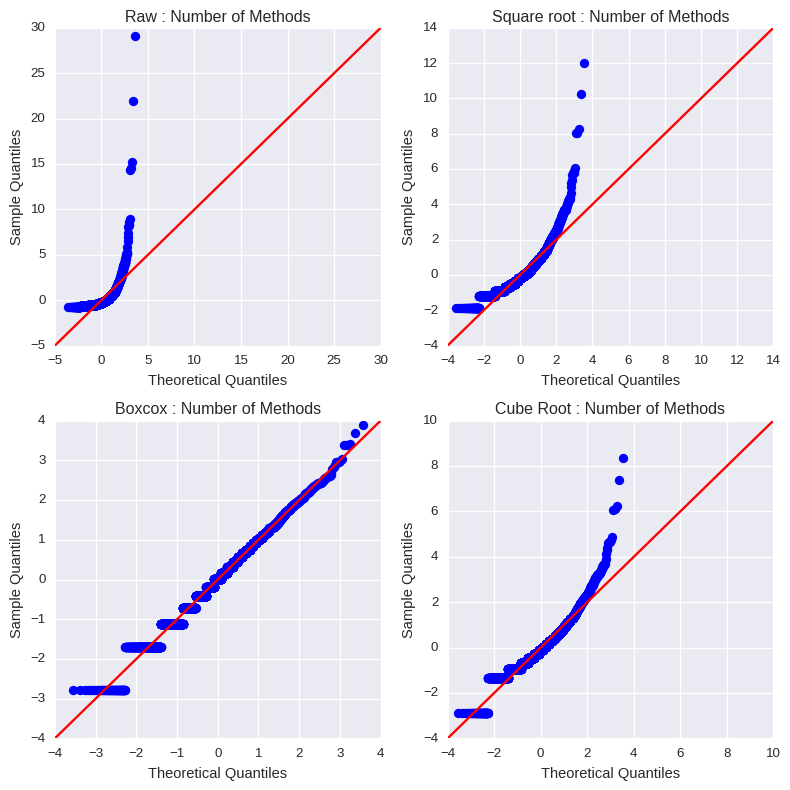

In [178]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.nom, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Methods')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.nom), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Methods')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.nom + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Number of Methods')

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(full.nom ), line='45', fit=True, ax=ax)
ax.set_title('Cube Root : Number of Methods')

plt.tight_layout()

# Use BoxCox
full['boxcox_nom'] = preprocessing.scale(boxcox(full.nom + 1) [0])

## 17 - Number of methods inherited
Measures the total number of methods that are inherited from parent and or interface classes.

count    5371.000000
mean       25.673245
std        40.646291
min         0.000000
25%         7.000000
50%        12.000000
75%        30.000000
max       602.000000
Name: nomi, dtype: float64

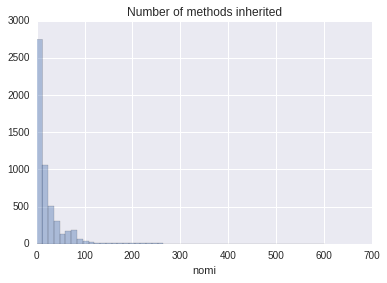

In [179]:
sb.distplot(full.nomi, kde=False)
__ = plt.title('Number of methods inherited')
full.nomi.describe()

### Transformation and scaling

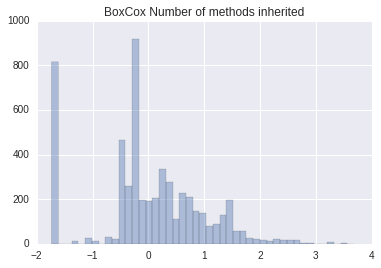

In [180]:
sb.distplot(preprocessing.scale(boxcox(full.nomi + 1) [0]), kde=False)
__ = plt.title('BoxCox Number of methods inherited')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


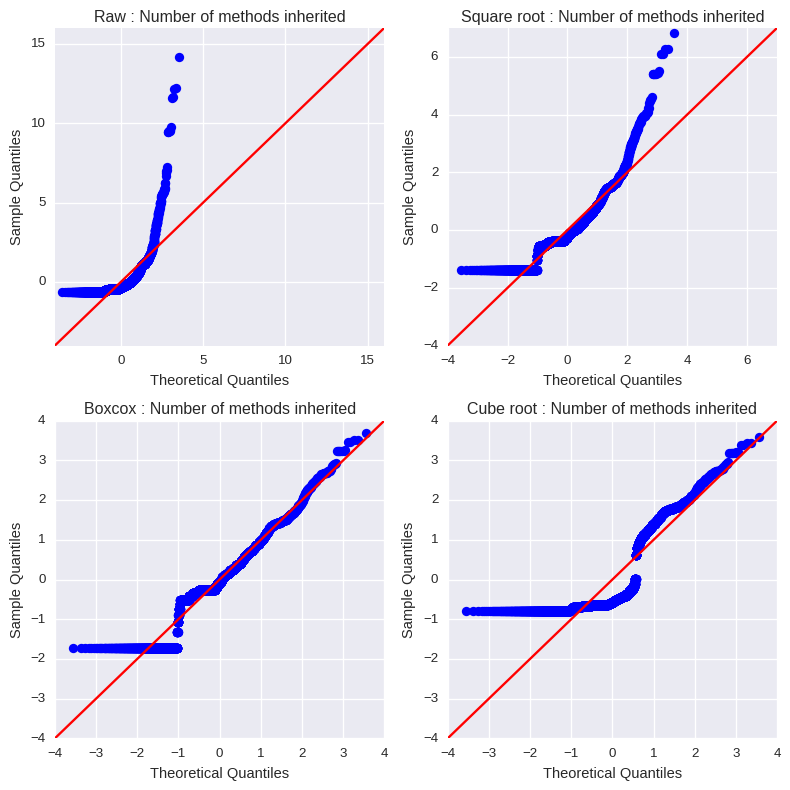

In [181]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.nomi, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of methods inherited')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.nomi), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of methods inherited')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(preprocessing.scale(boxcox(full.nomi + 1) [0]), line='45', fit=True, ax=ax)
ax.set_title('Boxcox : Number of methods inherited')
plt.tight_layout()

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.nomi)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of methods inherited')
plt.tight_layout()

# Use boxcox
full['boxcox_nomi'] = preprocessing.scale(boxcox(full.nomi + 1) [0])

## Target Variable - Number of Bugs

The number of Bugs in dataset is 886
0    0
dtype: int64


count    5371.000000
mean        0.270341
std         0.889151
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000
Name: bugs, dtype: float64

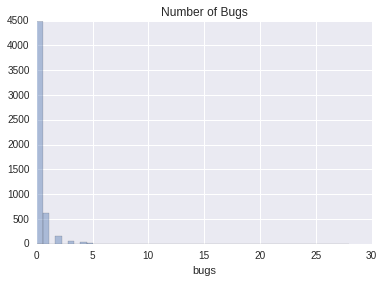

In [182]:
sb.distplot(full.bugs, kde=False)
__ = plt.title('Number of Bugs')
print('The number of Bugs in dataset is %d' % (full['bugs'] != 0).sum(axis=0))
print(full.bugs.mode())
full.bugs.describe()

### Transformation and scaling

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


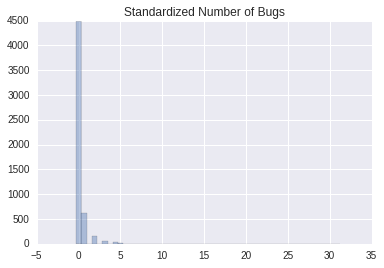

In [183]:
sb.distplot(preprocessing.scale(full.bugs), kde=False)
__ = plt.title('Standardized Number of Bugs')

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


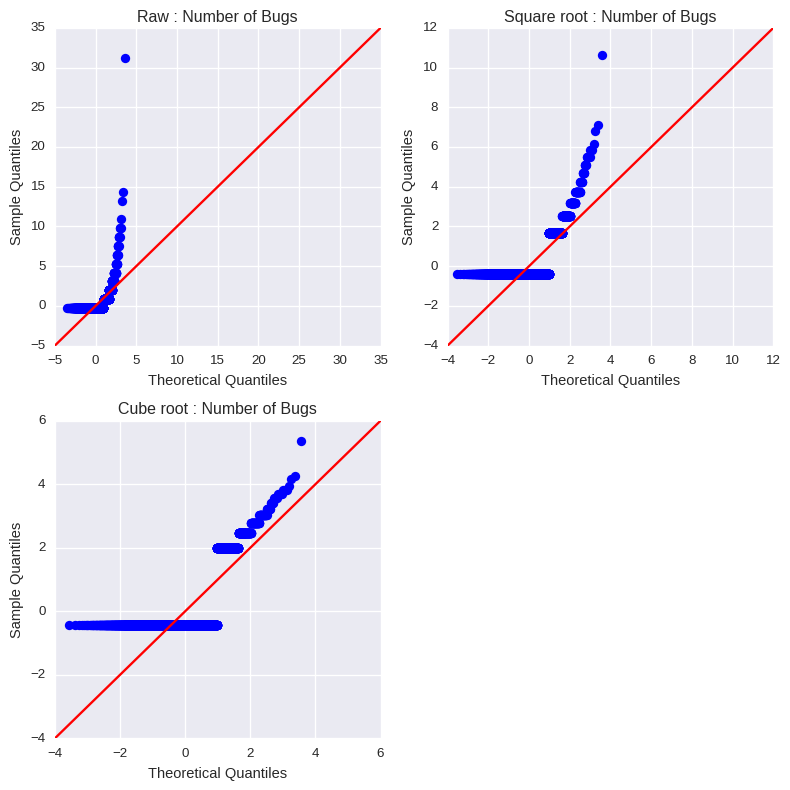

In [184]:
fig = plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(full.bugs, line='45', fit=True, ax=ax)
ax.set_title('Raw : Number of Bugs')

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(np.sqrt(full.bugs), line='45', fit=True, ax=ax)
ax.set_title('Square root : Number of Bugs')

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(np.cbrt(preprocessing.scale(full.bugs)), line='45', fit=True, ax=ax)
ax.set_title('Cube root : Number of Bugs')
plt.tight_layout()

full['cbrt_bugs'] = np.cbrt(preprocessing.scale(full.bugs))

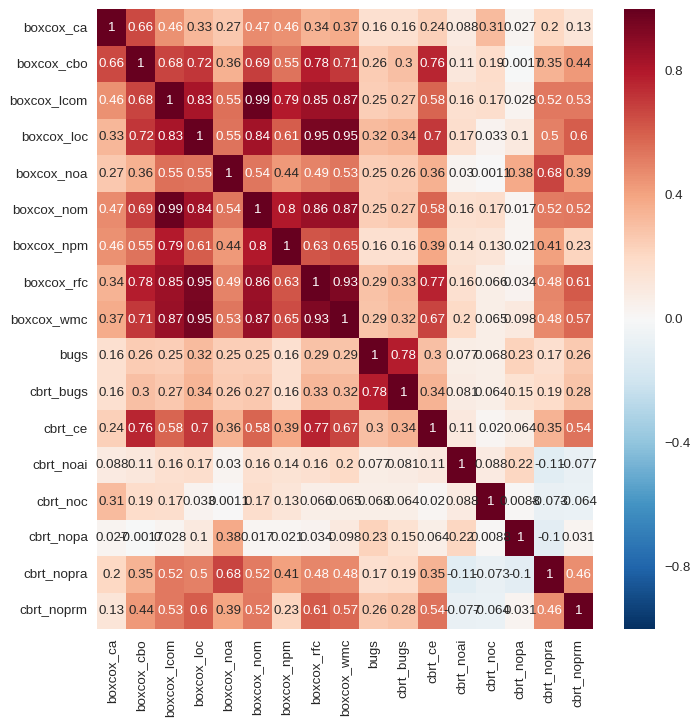

In [185]:
exclude = ['classname', 'wmc', 'dit', 'rfc', 'noc', 'cbo', 'lcom', 'ce', 'ca', 'noa', 'nopa', 'nopra',
           'noai', 'loc', 'nom', 'npm', 'noprm', 'nomi', 'std_dit', 'boxcox_nomi']

corr = full.ix[:, full.columns.difference(exclude)].corr()
plt.figure(figsize=(800/my_dpi, 800/my_dpi), dpi=my_dpi)
__  = sb.heatmap(corr, annot=True)

In [186]:
# Time to presist transformed data to a CSV file
# Remove the original and keep the transformed and scaled features.
full = full.drop(['wmc', 'dit', 'rfc', 'noc', 'cbo', 'lcom', 'ce', 'ca', 'noa', 'nopa', 'nopra',
                  'noai', 'loc', 'nom', 'npm', 'noprm', 'nomi'], axis=1)

full.to_csv('/media/ianh/space/ThinkfulData/PredictingSoftwareBugs/transformed_full-ambrose-metrics-ck-oo.csv', index=False)